In [31]:
NUM_CLASSES = 10

In [44]:
from tensorflow.keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [27]:
import numpy as np
x_train = np.expand_dims(x_train, axis=-1)
y_train = np.expand_dims(y_train, axis=-1)

x_train.shape, y_train.shape

((60000, 28, 28, 1), (60000, 10, 1))

In [36]:
from tensorflow.keras.layers import Input, Conv2D, Dense, Activation, MaxPool2D, Flatten
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Model

input_shape = x_train.shape[1:] # cutting off index 0 ===> img number

# input layer
input = Input(shape=input_shape)

# convolutional layers
x = Conv2D(filters=32, kernel_size=(4, 4), strides=2, padding="same")(input)
x = Activation("relu")(x)
x = Conv2D(filters=64, kernel_size=(2, 2), strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x) # POOLING
x = Conv2D(filters=64, kernel_size=(2, 2), strides=1, padding="same")(x)
x = Activation("relu")(x)
x = MaxPool2D()(x) # POOLING

# flatten
x = Flatten()(x)

# dense layer
x = Dense(128)(x)
x = Activation("relu")(x)

# output layer
out = Dense(NUM_CLASSES)(x)

DQN = Model(inputs=input, outputs=out)

In [37]:
DQN.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(lr=0.001),
    metrics = ["accuracy"])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


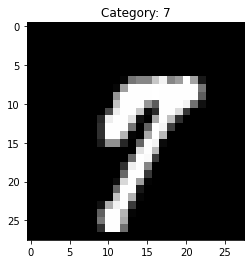

In [53]:
import matplotlib.pyplot as plt
from sklearn.utils import shuffle

x_train, y_train = shuffle(x_train, y_train)
plt.imshow(x_train[0], cmap="gray")
plt.title(f"Category: {y_train[0]}")
plt.show()

In [54]:
from tensorflow.keras.utils import to_categorical

def get_data():
    return shuffle(x_train, y_train)

In [55]:
for _ in range(15):
    x, y = get_data()
    for i in range(x_train.shape[0]):
        pass